# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

18:15:00 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=374413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=276380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=735789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=440525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=334471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=956982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

18:15:02 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=278494;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=734765;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

18:15:06 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=906589;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=780958;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

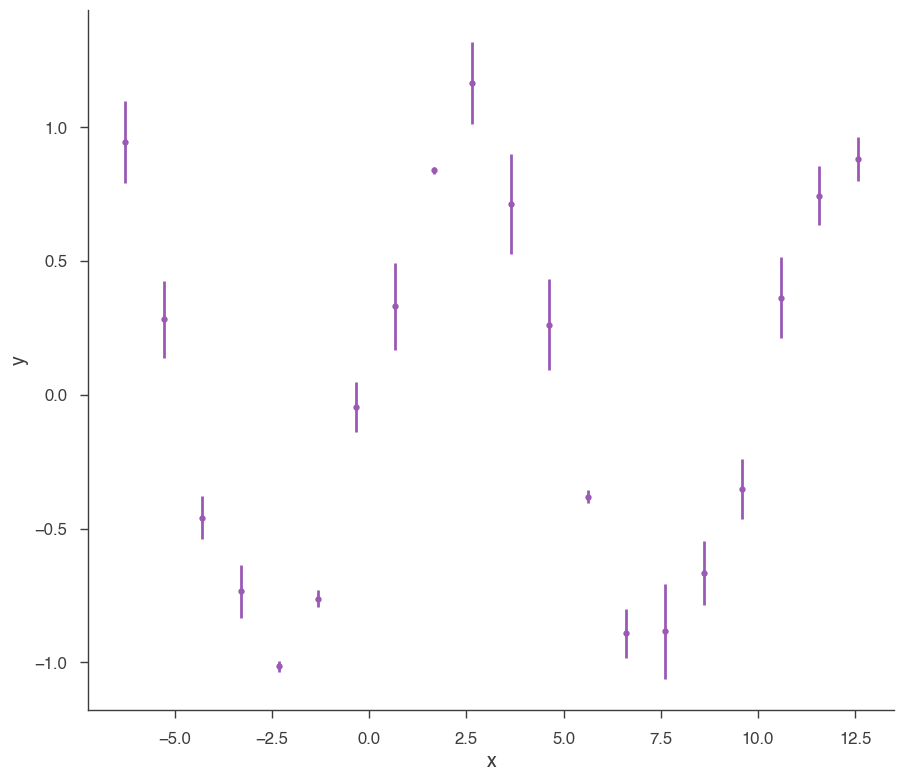

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=608831;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=65443;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18:15:10 INFO      Mean acceptance fraction: 0.7021999999999999                                ]8;id=772883;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=862111;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=115004;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=706007;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=141394;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=630619;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.90 -0.12 +0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.292882
total,-9.292882


Values of statistical measures:

,statistical measures
AIC,23.291645
BIC,24.577228
DIC,22.836518
PDIC,2.124701


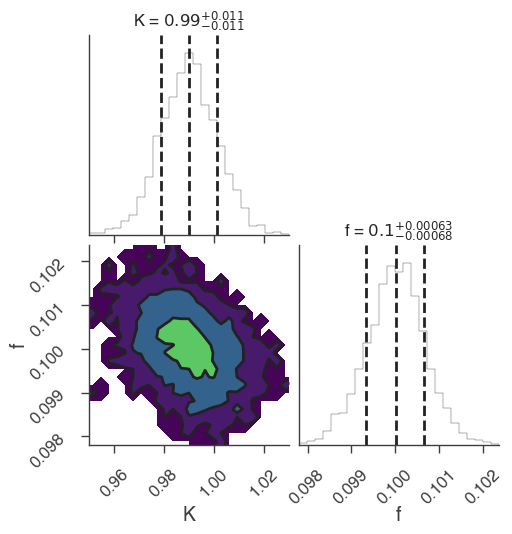

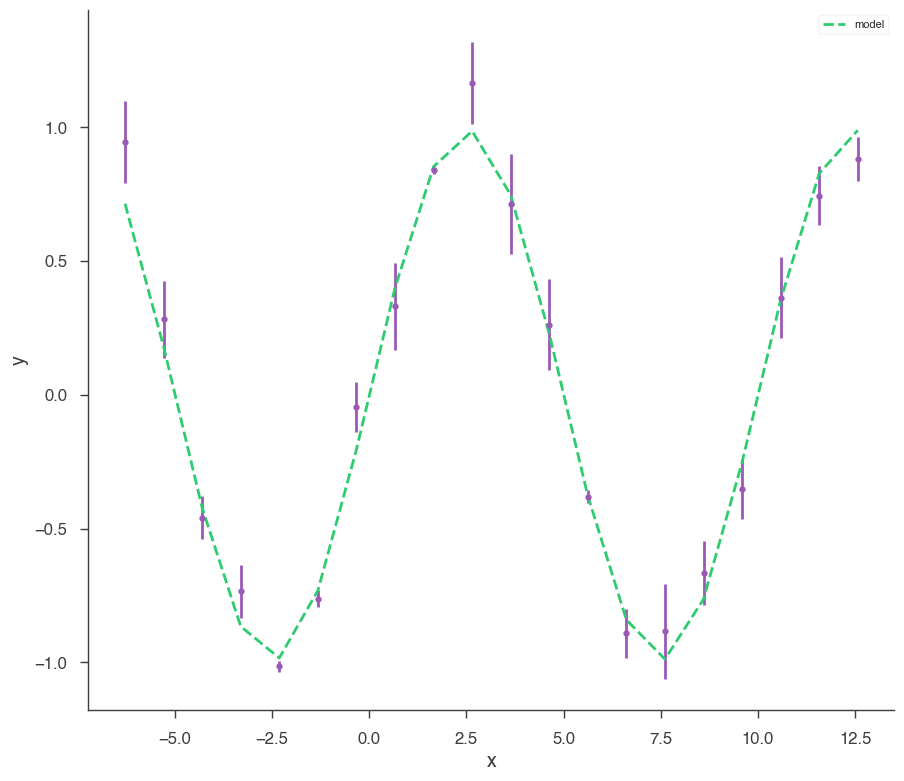

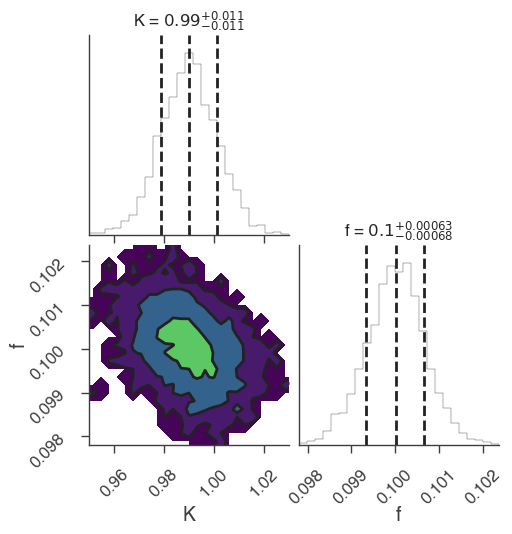

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

18:15:11 INFO      sampler set to multinest                                                ]8;id=173089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=973772;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -18.679502733032788      +/-  0.14485045153852041     
 Total Likelihood Evaluations:         6075
 Sampling finished. Exiting MultiNest
  analysing data from chains/fit-.txt


18:15:13 INFO      fit restored to maximum of posterior                                         ]8;id=90479;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=465209;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=867477;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=768868;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 +/- 0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 -0.06 +0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.293011
total,-9.293011


Values of statistical measures:

,statistical measures
AIC,23.291905
BIC,24.577487
DIC,22.527739
PDIC,1.969409
log(Z),-8.112405


         INFO      deleting the chain directory chains                                     ]8;id=104435;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=483937;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

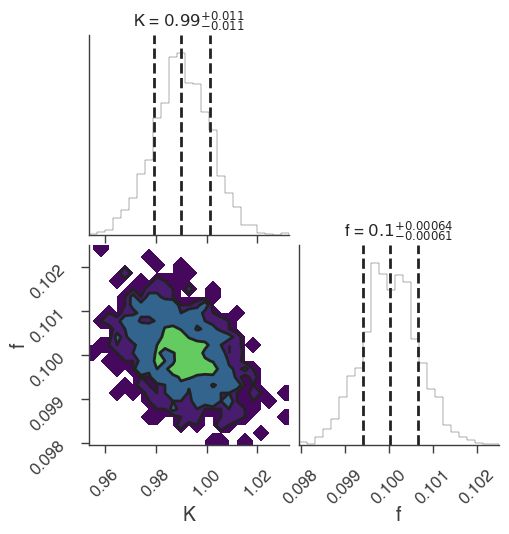

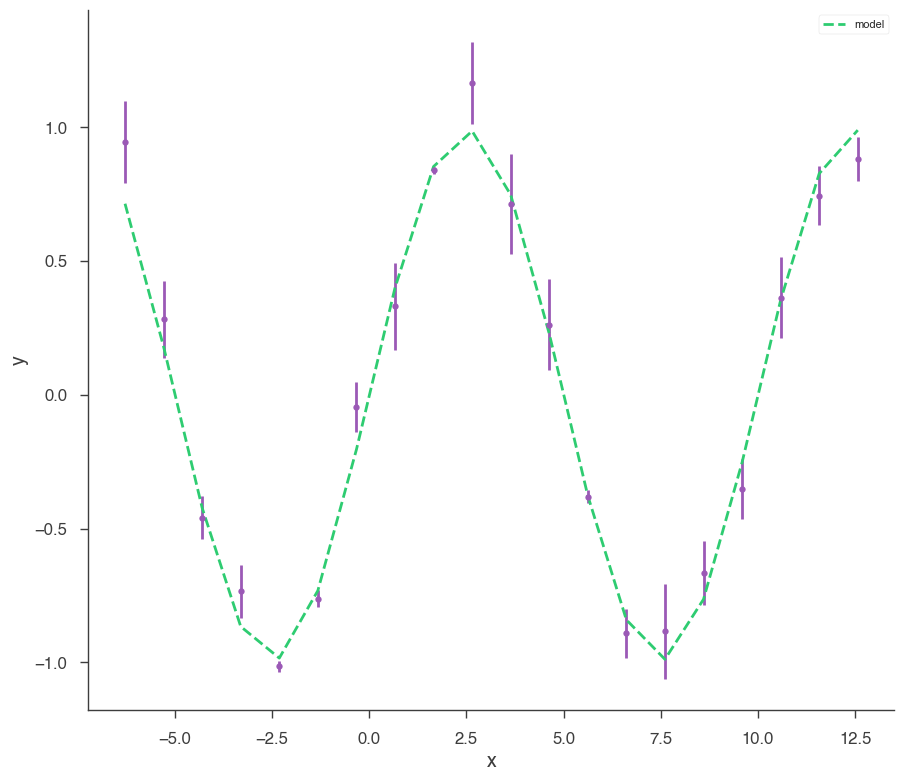

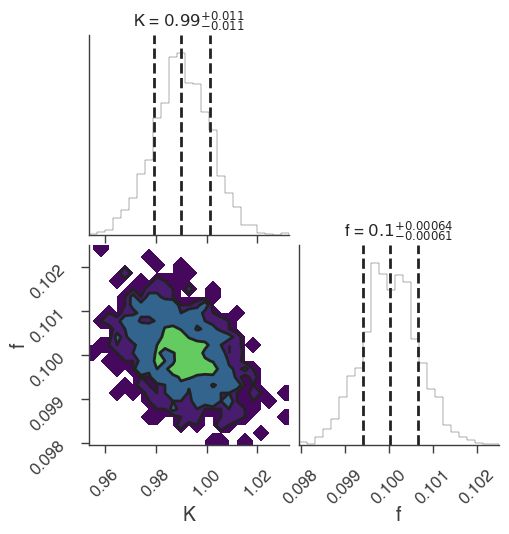

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=763159;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=138886;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

206it [00:00, 2055.97it/s, bound: 0 | nc: 2 | ncall: 666 | eff(%): 30.931 | loglstar:   -inf < -6769.157 <    inf | logz: -6776.356 +/-  0.134 | dlogz: 6854.485 >  0.409]

412it [00:00, 1542.25it/s, bound: 0 | nc: 3 | ncall: 1124 | eff(%): 36.655 | loglstar:   -inf < -3346.321 <    inf | logz: -3354.034 +/-  0.139 | dlogz: 3370.066 >  0.409]

574it [00:00, 1322.57it/s, bound: 0 | nc: 8 | ncall: 1686 | eff(%): 34.045 | loglstar:   -inf < -1921.876 <    inf | logz: -1929.994 +/-  0.142 | dlogz: 1941.526 >  0.409]

712it [00:00, 1101.30it/s, bound: 0 | nc: 14 | ncall: 2381 | eff(%): 29.903 | loglstar:   -inf < -1241.492 <    inf | logz: -1249.793 +/-  0.139 | dlogz: 1236.914 >  0.409]

828it [00:00, 874.36it/s, bound: 0 | nc: 7 | ncall: 3224 | eff(%): 25.682 | loglstar:   -inf < -977.239 <    inf | logz: -985.863 +/-  0.143 | dlogz: 972.977 >  0.409]     

923it [00:00, 779.00it/s, bound: 0 | nc: 5 | ncall: 4226 | eff(%): 21.841 | loglstar:   -inf < -887.870 <    inf | logz: -894.863 +/-  0.127 | dlogz: 882.731 >  0.409]

1006it [00:01, 610.96it/s, bound: 0 | nc: 2 | ncall: 5361 | eff(%): 18.765 | loglstar:   -inf < -826.684 <    inf | logz: -834.687 +/-  0.135 | dlogz: 822.814 >  0.409]

1074it [00:01, 490.53it/s, bound: 0 | nc: 7 | ncall: 6484 | eff(%): 16.564 | loglstar:   -inf < -703.368 <    inf | logz: -712.517 +/-  0.146 | dlogz: 701.650 >  0.409]

1129it [00:01, 394.94it/s, bound: 0 | nc: 73 | ncall: 7737 | eff(%): 14.592 | loglstar:   -inf < -635.767 <    inf | logz: -644.967 +/-  0.148 | dlogz: 634.025 >  0.409]

1174it [00:01, 354.68it/s, bound: 0 | nc: 2 | ncall: 8367 | eff(%): 14.031 | loglstar:   -inf < -579.769 <    inf | logz: -588.796 +/-  0.142 | dlogz: 576.890 >  0.409] 

1213it [00:01, 328.49it/s, bound: 0 | nc: 1 | ncall: 8953 | eff(%): 13.549 | loglstar:   -inf < -530.062 <    inf | logz: -538.408 +/-  0.142 | dlogz: 526.009 >  0.409]

1248it [00:02, 296.85it/s, bound: 0 | nc: 29 | ncall: 9769 | eff(%): 12.775 | loglstar:   -inf < -486.807 <    inf | logz: -495.923 +/-  0.146 | dlogz: 484.039 >  0.409]

1279it [00:02, 243.14it/s, bound: 0 | nc: 67 | ncall: 10785 | eff(%): 11.859 | loglstar:   -inf < -455.514 <    inf | logz: -463.832 +/-  0.140 | dlogz: 451.122 >  0.409]

1305it [00:02, 203.90it/s, bound: 0 | nc: 36 | ncall: 11648 | eff(%): 11.204 | loglstar:   -inf < -421.157 <    inf | logz: -429.860 +/-  0.141 | dlogz: 417.242 >  0.409]

1327it [00:02, 192.79it/s, bound: 0 | nc: 13 | ncall: 12301 | eff(%): 10.788 | loglstar:   -inf < -402.202 <    inf | logz: -412.049 +/-  0.152 | dlogz: 400.867 >  0.409]

1347it [00:02, 190.49it/s, bound: 0 | nc: 22 | ncall: 12706 | eff(%): 10.601 | loglstar:   -inf < -381.051 <    inf | logz: -390.006 +/-  0.147 | dlogz: 377.605 >  0.409]

1367it [00:02, 178.02it/s, bound: 0 | nc: 7 | ncall: 13237 | eff(%): 10.327 | loglstar:   -inf < -368.036 <    inf | logz: -376.857 +/-  0.139 | dlogz: 363.914 >  0.409] 

1385it [00:03, 129.96it/s, bound: 1 | nc: 1 | ncall: 13839 | eff(%): 10.008 | loglstar:   -inf < -351.726 <    inf | logz: -361.403 +/-  0.147 | dlogz: 349.175 >  0.409]

1525it [00:03, 364.79it/s, bound: 1 | nc: 1 | ncall: 14023 | eff(%): 10.875 | loglstar:   -inf < -258.110 <    inf | logz: -267.961 +/-  0.146 | dlogz: 254.997 >  0.409]

1646it [00:03, 540.13it/s, bound: 1 | nc: 5 | ncall: 14255 | eff(%): 11.547 | loglstar:   -inf < -197.298 <    inf | logz: -206.816 +/-  0.149 | dlogz: 193.704 >  0.409]

1728it [00:03, 448.69it/s, bound: 2 | nc: 1 | ncall: 14444 | eff(%): 11.963 | loglstar:   -inf < -168.889 <    inf | logz: -177.825 +/-  0.142 | dlogz: 164.026 >  0.409]

1862it [00:03, 622.88it/s, bound: 2 | nc: 2 | ncall: 14617 | eff(%): 12.739 | loglstar:   -inf < -128.532 <    inf | logz: -137.626 +/-  0.146 | dlogz: 123.435 >  0.409]

1989it [00:03, 763.30it/s, bound: 2 | nc: 2 | ncall: 14840 | eff(%): 13.403 | loglstar:   -inf < -96.317 <    inf | logz: -105.617 +/-  0.145 | dlogz: 91.083 >  0.409]  

2092it [00:04, 592.69it/s, bound: 3 | nc: 1 | ncall: 15045 | eff(%): 13.905 | loglstar:   -inf < -79.842 <    inf | logz: -89.075 +/-  0.145 | dlogz: 74.237 >  0.409] 

2248it [00:04, 781.67it/s, bound: 3 | nc: 1 | ncall: 15261 | eff(%): 14.730 | loglstar:   -inf < -56.231 <    inf | logz: -65.157 +/-  0.143 | dlogz: 50.258 >  0.409]

2381it [00:04, 899.79it/s, bound: 3 | nc: 2 | ncall: 15507 | eff(%): 15.354 | loglstar:   -inf < -42.988 <    inf | logz: -52.350 +/-  0.145 | dlogz: 37.124 >  0.409]

2492it [00:04, 677.13it/s, bound: 4 | nc: 1 | ncall: 15722 | eff(%): 15.850 | loglstar:   -inf < -34.441 <    inf | logz: -43.702 +/-  0.146 | dlogz: 28.176 >  0.409]

2611it [00:04, 776.82it/s, bound: 4 | nc: 1 | ncall: 15913 | eff(%): 16.408 | loglstar:   -inf < -27.655 <    inf | logz: -37.129 +/-  0.146 | dlogz: 21.354 >  0.409]

2710it [00:04, 822.56it/s, bound: 4 | nc: 4 | ncall: 16145 | eff(%): 16.785 | loglstar:   -inf < -23.908 <    inf | logz: -33.402 +/-  0.145 | dlogz: 17.369 >  0.409]

2809it [00:05, 654.39it/s, bound: 5 | nc: 1 | ncall: 16301 | eff(%): 17.232 | loglstar:   -inf < -20.142 <    inf | logz: -29.865 +/-  0.147 | dlogz: 13.584 >  0.409]

2958it [00:05, 824.66it/s, bound: 5 | nc: 1 | ncall: 16518 | eff(%): 17.908 | loglstar:   -inf < -17.134 <    inf | logz: -26.458 +/-  0.144 | dlogz:  9.785 >  0.409]

3107it [00:05, 973.80it/s, bound: 5 | nc: 10 | ncall: 16839 | eff(%): 18.451 | loglstar:   -inf < -14.644 <    inf | logz: -24.105 +/-  0.145 | dlogz:  7.059 >  0.409]

3223it [00:05, 813.11it/s, bound: 6 | nc: 1 | ncall: 16998 | eff(%): 18.961 | loglstar:   -inf < -13.209 <    inf | logz: -22.730 +/-  0.145 | dlogz:  5.395 >  0.409] 

3371it [00:05, 957.48it/s, bound: 6 | nc: 4 | ncall: 17278 | eff(%): 19.510 | loglstar:   -inf < -11.921 <    inf | logz: -21.430 +/-  0.145 | dlogz:  3.742 >  0.409]

3484it [00:05, 812.02it/s, bound: 7 | nc: 1 | ncall: 17498 | eff(%): 19.911 | loglstar:   -inf < -11.266 <    inf | logz: -20.715 +/-  0.145 | dlogz:  2.785 >  0.409]

3637it [00:05, 966.75it/s, bound: 7 | nc: 1 | ncall: 17722 | eff(%): 20.523 | loglstar:   -inf < -10.672 <    inf | logz: -20.069 +/-  0.145 | dlogz:  1.859 >  0.409]

3751it [00:05, 1000.01it/s, bound: 7 | nc: 1 | ncall: 17938 | eff(%): 20.911 | loglstar:   -inf < -10.321 <    inf | logz: -19.728 +/-  0.145 | dlogz:  1.361 >  0.409]

3864it [00:06, 756.68it/s, bound: 8 | nc: 1 | ncall: 18135 | eff(%): 21.307 | loglstar:   -inf < -10.086 <    inf | logz: -19.474 +/-  0.145 | dlogz:  0.991 >  0.409] 

4019it [00:06, 921.39it/s, bound: 8 | nc: 2 | ncall: 18369 | eff(%): 21.879 | loglstar:   -inf < -9.840 <    inf | logz: -19.226 +/-  0.145 | dlogz:  0.640 >  0.409] 

4160it [00:06, 783.90it/s, bound: 9 | nc: 1 | ncall: 18654 | eff(%): 22.301 | loglstar:   -inf < -9.685 <    inf | logz: -19.071 +/-  0.145 | dlogz:  0.432 >  0.409]

4179it [00:06, 625.47it/s, +400 | bound: 9 | nc: 1 | ncall: 19075 | eff(%): 24.519 | loglstar:   -inf < -9.303 <    inf | logz: -18.703 +/-  0.145 | dlogz:  0.001 >  0.409]

18:15:20 INFO      fit restored to maximum of posterior                                         ]8;id=817884;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=216183;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=111717;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=731889;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.11 +0.10) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 -0.06 +0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.294179
total,-9.294179


Values of statistical measures:

,statistical measures
AIC,23.294241
BIC,24.579823
DIC,22.554425
PDIC,1.984078
log(Z),-8.122519


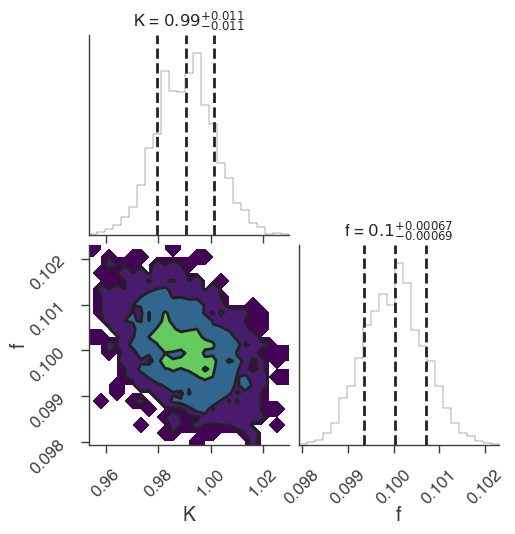

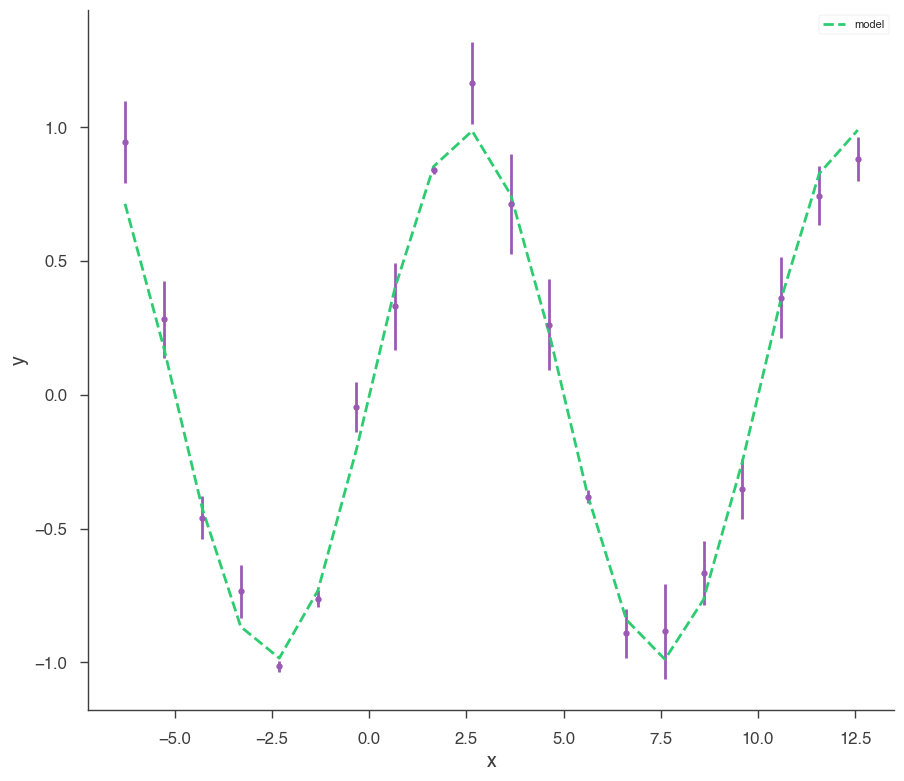

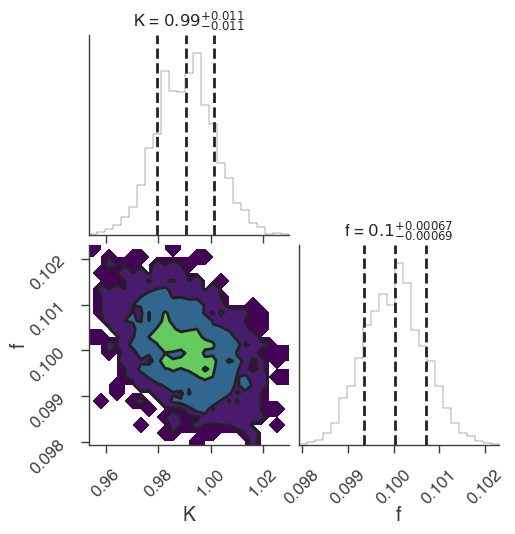

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

18:15:21 INFO      sampler set to dynesty_dynamic                                          ]8;id=340005;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=120796;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

40it [00:00, 399.80it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 42 | eff(%):  7.380 | loglstar:   -inf < -15875.787 <    inf | logz: -15882.775 +/-  0.118 | dlogz: 16119.146 >  0.010]

221it [00:00, 1227.71it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 269 | eff(%): 28.739 | loglstar:   -inf < -8631.511 <    inf | logz: -8638.860 +/-  0.121 | dlogz: 8654.243 >  0.010]

356it [00:00, 1282.69it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 503 | eff(%): 35.494 | loglstar:   -inf < -4805.771 <    inf | logz: -4813.390 +/-  0.123 | dlogz: 4824.329 >  0.010]

485it [00:00, 1187.31it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 805 | eff(%): 37.165 | loglstar:   -inf < -3711.567 <    inf | logz: -3718.586 +/-  0.117 | dlogz: 3699.163 >  0.010]

605it [00:00, 1102.73it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1174 | eff(%): 36.141 | loglstar:   -inf < -2857.674 <    inf | logz: -2865.791 +/-  0.127 | dlogz: 2855.511 >  0.010]

717it [00:00, 948.82it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1696 | eff(%): 32.650 | loglstar:   -inf < -2040.758 <    inf | logz: -2048.532 +/-  0.121 | dlogz: 2030.105 >  0.010] 

816it [00:00, 803.68it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 2181 | eff(%): 30.436 | loglstar:   -inf < -1555.992 <    inf | logz: -1564.402 +/-  0.127 | dlogz: 1547.055 >  0.010]

902it [00:01, 707.73it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 2679 | eff(%): 28.374 | loglstar:   -inf < -1302.100 <    inf | logz: -1310.462 +/-  0.126 | dlogz: 1300.334 >  0.010]

977it [00:01, 627.47it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 3103 | eff(%): 27.116 | loglstar:   -inf < -1134.526 <    inf | logz: -1143.201 +/-  0.128 | dlogz: 1133.408 >  0.010]

1044it [00:01, 581.67it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3618 | eff(%): 25.352 | loglstar:   -inf < -1040.872 <    inf | logz: -1049.530 +/-  0.125 | dlogz: 1038.714 >  0.010]

1105it [00:01, 547.21it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 4094 | eff(%): 24.053 | loglstar:   -inf < -971.045 <    inf | logz: -979.112 +/-  0.125 | dlogz: 967.743 >  0.010]  

1161it [00:01, 510.71it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4587 | eff(%): 22.823 | loglstar:   -inf < -915.835 <    inf | logz: -924.124 +/-  0.123 | dlogz: 912.359 >  0.010] 

1213it [00:01, 487.05it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 5092 | eff(%): 21.692 | loglstar:   -inf < -878.974 <    inf | logz: -886.849 +/-  0.118 | dlogz: 874.626 >  0.010]

1262it [00:01, 459.79it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 5582 | eff(%): 20.750 | loglstar:   -inf < -854.826 <    inf | logz: -862.544 +/-  0.120 | dlogz: 850.568 >  0.010]

1308it [00:01, 421.75it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6133 | eff(%): 19.720 | loglstar:   -inf < -820.932 <    inf | logz: -829.834 +/-  0.129 | dlogz: 818.693 >  0.010]

1351it [00:02, 380.97it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 6751 | eff(%): 18.632 | loglstar:   -inf < -772.048 <    inf | logz: -779.845 +/-  0.120 | dlogz: 767.625 >  0.010]

1390it [00:02, 354.09it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 7270 | eff(%): 17.889 | loglstar:   -inf < -725.547 <    inf | logz: -734.123 +/-  0.126 | dlogz: 722.454 >  0.010]

1426it [00:02, 292.76it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 8060 | eff(%): 16.659 | loglstar:   -inf < -670.305 <    inf | logz: -679.276 +/-  0.128 | dlogz: 667.882 >  0.010]

1457it [00:02, 270.83it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 8642 | eff(%): 15.937 | loglstar:   -inf < -636.700 <    inf | logz: -646.298 +/-  0.133 | dlogz: 635.583 >  0.010] 

1485it [00:02, 269.09it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 9026 | eff(%): 15.589 | loglstar:   -inf < -601.028 <    inf | logz: -609.519 +/-  0.127 | dlogz: 597.577 >  0.010]

1513it [00:02, 247.25it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 9564 | eff(%): 15.034 | loglstar:   -inf < -576.292 <    inf | logz: -585.059 +/-  0.126 | dlogz: 573.120 >  0.010]

1539it [00:02, 248.07it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 10091 | eff(%): 14.531 | loglstar:   -inf < -549.847 <    inf | logz: -559.477 +/-  0.133 | dlogz: 548.384 >  0.010]

1565it [00:03, 242.41it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 10590 | eff(%): 14.112 | loglstar:   -inf < -529.998 <    inf | logz: -539.095 +/-  0.126 | dlogz: 527.039 >  0.010]

1590it [00:03, 236.54it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 11036 | eff(%): 13.783 | loglstar:   -inf < -500.874 <    inf | logz: -509.884 +/-  0.125 | dlogz: 497.685 >  0.010]

1614it [00:03, 228.92it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 11478 | eff(%): 13.475 | loglstar:   -inf < -481.282 <    inf | logz: -489.749 +/-  0.125 | dlogz: 477.333 >  0.010] 

1637it [00:03, 226.70it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 12107 | eff(%): 12.985 | loglstar:   -inf < -458.181 <    inf | logz: -467.573 +/-  0.129 | dlogz: 455.514 >  0.010]

1660it [00:03, 213.44it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 12662 | eff(%): 12.612 | loglstar:   -inf < -440.688 <    inf | logz: -450.881 +/-  0.141 | dlogz: 441.605 >  0.010]

1682it [00:03, 208.66it/s, batch: 0 | bound: 0 | nc: 47 | ncall: 13224 | eff(%): 12.256 | loglstar:   -inf < -426.394 <    inf | logz: -435.424 +/-  0.127 | dlogz: 423.003 >  0.010]

1703it [00:03, 204.94it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 13672 | eff(%): 12.017 | loglstar:   -inf < -416.198 <    inf | logz: -424.805 +/-  0.127 | dlogz: 412.211 >  0.010]

1724it [00:03, 196.22it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 14226 | eff(%): 11.707 | loglstar:   -inf < -398.926 <    inf | logz: -408.142 +/-  0.128 | dlogz: 395.683 >  0.010]

1744it [00:03, 185.70it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 15057 | eff(%): 11.210 | loglstar:   -inf < -377.879 <    inf | logz: -386.585 +/-  0.128 | dlogz: 373.881 >  0.010]

1763it [00:04, 186.44it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 15491 | eff(%): 11.025 | loglstar:   -inf < -363.378 <    inf | logz: -372.757 +/-  0.134 | dlogz: 360.641 >  0.010] 

1782it [00:04, 170.34it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 16102 | eff(%): 10.734 | loglstar:   -inf < -353.473 <    inf | logz: -362.928 +/-  0.127 | dlogz: 350.371 >  0.010]

1800it [00:04, 157.38it/s, batch: 0 | bound: 0 | nc: 97 | ncall: 16778 | eff(%): 10.418 | loglstar:   -inf < -337.416 <    inf | logz: -346.703 +/-  0.130 | dlogz: 334.095 >  0.010]

1817it [00:04, 145.70it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 17455 | eff(%): 10.120 | loglstar:   -inf < -326.902 <    inf | logz: -336.095 +/-  0.127 | dlogz: 323.287 >  0.010]

1832it [00:04, 112.02it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17770 | eff(%): 10.027 | loglstar:   -inf < -315.653 <    inf | logz: -324.669 +/-  0.125 | dlogz: 311.755 >  0.010] 

2006it [00:04, 459.23it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18013 | eff(%): 10.836 | loglstar:   -inf < -228.730 <    inf | logz: -238.024 +/-  0.127 | dlogz: 224.773 >  0.010]

2147it [00:04, 680.82it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18283 | eff(%): 11.431 | loglstar:   -inf < -173.721 <    inf | logz: -182.411 +/-  0.126 | dlogz: 168.666 >  0.010]

2245it [00:05, 536.85it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18510 | eff(%): 11.810 | loglstar:   -inf < -144.109 <    inf | logz: -153.155 +/-  0.127 | dlogz: 139.245 >  0.010]

2417it [00:05, 775.81it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18743 | eff(%): 12.560 | loglstar:   -inf < -105.056 <    inf | logz: -114.444 +/-  0.131 | dlogz: 100.209 >  0.010]

2527it [00:05, 847.76it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18912 | eff(%): 13.018 | loglstar:   -inf < -86.424 <    inf | logz: -95.465 +/-  0.129 | dlogz: 81.094 >  0.010]   

2631it [00:05, 889.96it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19142 | eff(%): 13.395 | loglstar:   -inf < -72.524 <    inf | logz: -81.729 +/-  0.129 | dlogz: 67.148 >  0.010]

2734it [00:05, 575.43it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19325 | eff(%): 13.791 | loglstar:   -inf < -61.385 <    inf | logz: -70.764 +/-  0.129 | dlogz: 55.974 >  0.010]

2872it [00:05, 723.30it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19515 | eff(%): 14.349 | loglstar:   -inf < -50.053 <    inf | logz: -59.414 +/-  0.129 | dlogz: 44.426 >  0.010]

2985it [00:06, 807.99it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19700 | eff(%): 14.777 | loglstar:   -inf < -42.489 <    inf | logz: -51.692 +/-  0.130 | dlogz: 36.457 >  0.010]

3088it [00:06, 857.64it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19900 | eff(%): 15.137 | loglstar:   -inf < -37.570 <    inf | logz: -47.057 +/-  0.129 | dlogz: 31.618 >  0.010]

3191it [00:06, 550.88it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20077 | eff(%): 15.508 | loglstar:   -inf < -32.121 <    inf | logz: -41.758 +/-  0.131 | dlogz: 26.112 >  0.010]

3324it [00:06, 689.15it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20264 | eff(%): 16.008 | loglstar:   -inf < -26.146 <    inf | logz: -35.550 +/-  0.131 | dlogz: 19.616 >  0.010]

3467it [00:06, 837.05it/s, batch: 0 | bound: 4 | nc: 8 | ncall: 20535 | eff(%): 16.482 | loglstar:   -inf < -22.093 <    inf | logz: -31.441 +/-  0.129 | dlogz: 15.213 >  0.010]

3577it [00:06, 627.84it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20778 | eff(%): 16.811 | loglstar:   -inf < -19.519 <    inf | logz: -29.019 +/-  0.130 | dlogz: 12.569 >  0.010]

3746it [00:07, 821.83it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20995 | eff(%): 17.427 | loglstar:   -inf < -16.791 <    inf | logz: -26.221 +/-  0.130 | dlogz:  9.426 >  0.010]

3888it [00:07, 945.02it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21240 | eff(%): 17.884 | loglstar:   -inf < -14.961 <    inf | logz: -24.438 +/-  0.130 | dlogz:  7.358 >  0.010]

4011it [00:07, 750.39it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21515 | eff(%): 18.219 | loglstar:   -inf < -13.835 <    inf | logz: -23.255 +/-  0.130 | dlogz:  5.928 >  0.010]

4187it [00:07, 947.06it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21737 | eff(%): 18.829 | loglstar:   -inf < -12.526 <    inf | logz: -22.004 +/-  0.130 | dlogz:  4.342 >  0.010]

4340it [00:07, 1073.34it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21995 | eff(%): 19.293 | loglstar:   -inf < -11.679 <    inf | logz: -21.193 +/-  0.130 | dlogz:  3.255 >  0.010]

4472it [00:07, 784.10it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22279 | eff(%): 19.632 | loglstar:   -inf < -11.158 <    inf | logz: -20.661 +/-  0.130 | dlogz:  2.504 >  0.010] 

4645it [00:08, 963.11it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 22503 | eff(%): 20.193 | loglstar:   -inf < -10.643 <    inf | logz: -20.144 +/-  0.130 | dlogz:  1.755 >  0.010]

4790it [00:08, 1066.59it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 22743 | eff(%): 20.608 | loglstar:   -inf < -10.298 <    inf | logz: -19.831 +/-  0.130 | dlogz:  1.285 >  0.010]

4922it [00:08, 1020.64it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22996 | eff(%): 20.948 | loglstar:   -inf < -10.090 <    inf | logz: -19.610 +/-  0.130 | dlogz:  0.959 >  0.010]

5042it [00:08, 828.15it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23153 | eff(%): 21.317 | loglstar:   -inf < -9.930 <    inf | logz: -19.453 +/-  0.130 | dlogz:  0.734 >  0.010]  

5199it [00:08, 979.77it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23405 | eff(%): 21.749 | loglstar:   -inf < -9.766 <    inf | logz: -19.298 +/-  0.130 | dlogz:  0.517 >  0.010]

5316it [00:08, 992.73it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23657 | eff(%): 22.006 | loglstar:   -inf < -9.666 <    inf | logz: -19.208 +/-  0.130 | dlogz:  0.399 >  0.010]

5429it [00:08, 694.37it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23835 | eff(%): 22.309 | loglstar:   -inf < -9.589 <    inf | logz: -19.139 +/-  0.130 | dlogz:  0.311 >  0.010]

5581it [00:09, 849.34it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24061 | eff(%): 22.723 | loglstar:   -inf < -9.521 <    inf | logz: -19.068 +/-  0.130 | dlogz:  0.224 >  0.010]

5712it [00:09, 945.20it/s, batch: 0 | bound: 9 | nc: 5 | ncall: 24324 | eff(%): 23.010 | loglstar:   -inf < -9.469 <    inf | logz: -19.021 +/-  0.130 | dlogz:  0.169 >  0.010]

5828it [00:09, 737.15it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24554 | eff(%): 23.262 | loglstar:   -inf < -9.430 <    inf | logz: -18.989 +/-  0.130 | dlogz:  0.132 >  0.010]

6010it [00:09, 949.19it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24795 | eff(%): 23.760 | loglstar:   -inf < -9.392 <    inf | logz: -18.951 +/-  0.130 | dlogz:  0.090 >  0.010]

6153it [00:09, 1053.28it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 25092 | eff(%): 24.043 | loglstar:   -inf < -9.366 <    inf | logz: -18.930 +/-  0.130 | dlogz:  0.067 >  0.010]

6280it [00:09, 811.46it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25328 | eff(%): 24.315 | loglstar:   -inf < -9.353 <    inf | logz: -18.915 +/-  0.130 | dlogz:  0.052 >  0.010] 

6487it [00:09, 1062.52it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25642 | eff(%): 24.814 | loglstar:   -inf < -9.335 <    inf | logz: -18.898 +/-  0.130 | dlogz:  0.034 >  0.010]

6635it [00:10, 1153.32it/s, batch: 0 | bound: 11 | nc: 7 | ncall: 25949 | eff(%): 25.086 | loglstar:   -inf < -9.327 <    inf | logz: -18.889 +/-  0.130 | dlogz:  0.025 >  0.010]

6774it [00:10, 908.29it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26141 | eff(%): 25.427 | loglstar:   -inf < -9.320 <    inf | logz: -18.883 +/-  0.130 | dlogz:  0.019 >  0.010] 

6919it [00:10, 1018.61it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26387 | eff(%): 25.734 | loglstar:   -inf < -9.316 <    inf | logz: -18.879 +/-  0.130 | dlogz:  0.014 >  0.010]

7049it [00:10, 1080.91it/s, batch: 0 | bound: 12 | nc: 5 | ncall: 26648 | eff(%): 25.965 | loglstar:   -inf < -9.313 <    inf | logz: -18.875 +/-  0.130 | dlogz:  0.011 >  0.010]

7412it [00:10, 1702.72it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 27068 | eff(%): 27.200 | loglstar:   -inf < -9.306 <    inf | logz: -18.868 +/-  0.130 | dlogz:  0.004 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7609it [00:11, 565.49it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27266 | eff(%): 27.362 | loglstar: -11.204 < -11.149 < -9.831 | logz: -18.865 +/-  0.134 | stop:  1.386]          

7818it [00:11, 726.02it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27553 | eff(%): 27.826 | loglstar: -11.204 < -10.470 < -9.831 | logz: -18.865 +/-  0.134 | stop:  1.386]

8012it [00:11, 884.36it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27962 | eff(%): 28.107 | loglstar: -11.204 < -10.085 < -9.831 | logz: -18.865 +/-  0.134 | stop:  1.386]

8185it [00:11, 875.91it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28202 | eff(%): 28.475 | loglstar: -11.204 < -9.863 < -9.831 | logz: -18.865 +/-  0.134 | stop:  1.386] 

8691it [00:12, 1554.28it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28766 | eff(%): 30.185 | loglstar: -11.204 < -9.331 < -9.831 | logz: -18.865 +/-  0.134 | stop:  1.386]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8945it [00:13, 647.91it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29050 | eff(%): 30.348 | loglstar: -11.702 < -10.716 < -11.202 | logz: -18.847 +/-  0.110 | stop:  1.084]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9326it [00:13, 608.80it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29475 | eff(%): 31.640 | loglstar: -11.702 < -9.305 < -11.202 | logz: -18.847 +/-  0.110 | stop:  0.983] 

9326it [00:13, 678.01it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29475 | eff(%): 31.640 | loglstar: -11.702 < -9.305 < -11.202 | logz: -18.847 +/-  0.110 | stop:  0.983]

18:15:36 INFO      fit restored to maximum of posterior                                         ]8;id=172312;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=336741;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=753378;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=966961;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 +/- 0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.292862
total,-9.292862


Values of statistical measures:

,statistical measures
AIC,23.291607
BIC,24.577189
DIC,22.622754
PDIC,2.018478
log(Z),-8.180718


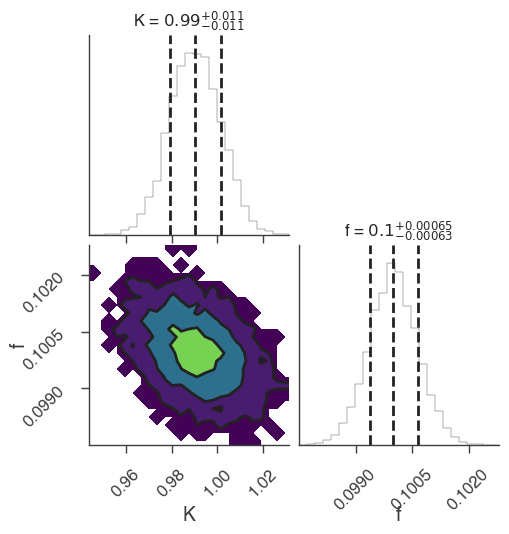

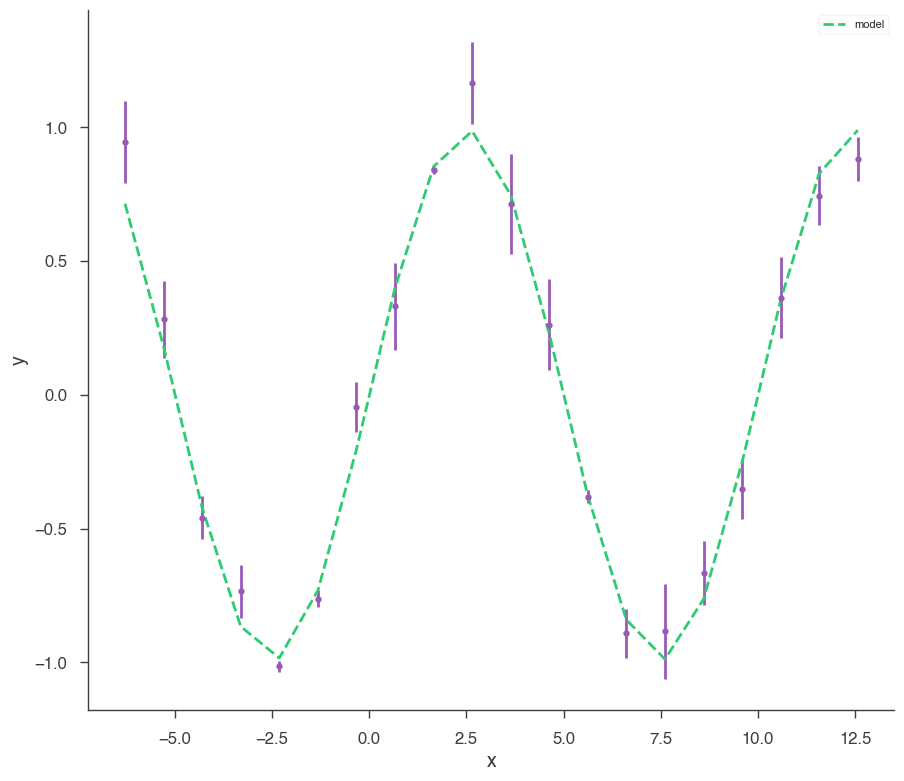

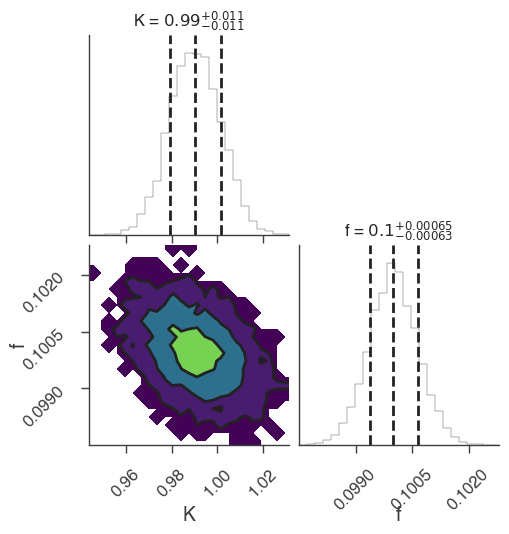

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

18:15:37 INFO      sampler set to zeus                                                     ]8;id=232752;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=288252;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:14, 43.30it/s]

Sampling progress :   2%|▏         | 11/625 [00:00<00:12, 48.64it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:18, 33.31it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:14, 42.39it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:16, 35.58it/s]

Sampling progress :   5%|▌         | 34/625 [00:00<00:14, 41.23it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:12, 45.93it/s]

Sampling progress :   8%|▊         | 47/625 [00:01<00:11, 50.46it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:12, 46.78it/s]

Sampling progress :   9%|▉         | 59/625 [00:01<00:11, 49.45it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:13, 40.18it/s]

Sampling progress :  11%|█▏        | 71/625 [00:01<00:12, 44.48it/s]

Sampling progress :  12%|█▏        | 77/625 [00:01<00:11, 47.29it/s]

Sampling progress :  13%|█▎        | 83/625 [00:01<00:10, 49.63it/s]

Sampling progress :  14%|█▍        | 89/625 [00:01<00:10, 50.44it/s]

Sampling progress :  15%|█▌        | 95/625 [00:02<00:10, 49.00it/s]

Sampling progress :  16%|█▌        | 101/625 [00:02<00:10, 50.30it/s]

Sampling progress :  17%|█▋        | 107/625 [00:02<00:09, 52.20it/s]

Sampling progress :  18%|█▊        | 113/625 [00:02<00:09, 51.64it/s]

Sampling progress :  19%|█▉        | 119/625 [00:02<00:10, 50.35it/s]

Sampling progress :  20%|██        | 125/625 [00:02<00:10, 47.93it/s]

Sampling progress :  21%|██        | 131/625 [00:02<00:09, 49.59it/s]

Sampling progress :  22%|██▏       | 137/625 [00:02<00:10, 48.40it/s]

Sampling progress :  23%|██▎       | 142/625 [00:03<00:10, 47.49it/s]

Sampling progress :  24%|██▎       | 147/625 [00:03<00:10, 46.00it/s]

Sampling progress :  24%|██▍       | 152/625 [00:03<00:10, 46.79it/s]

Sampling progress :  25%|██▌       | 157/625 [00:03<00:09, 47.53it/s]

Sampling progress :  26%|██▌       | 163/625 [00:03<00:09, 50.82it/s]

Sampling progress :  27%|██▋       | 169/625 [00:03<00:08, 52.97it/s]

Sampling progress :  28%|██▊       | 176/625 [00:03<00:07, 56.60it/s]

Sampling progress :  29%|██▉       | 183/625 [00:03<00:07, 59.42it/s]

Sampling progress :  30%|███       | 189/625 [00:03<00:07, 58.86it/s]

Sampling progress :  31%|███       | 195/625 [00:04<00:07, 56.00it/s]

Sampling progress :  32%|███▏      | 201/625 [00:04<00:07, 54.68it/s]

Sampling progress :  33%|███▎      | 207/625 [00:04<00:07, 53.97it/s]

Sampling progress :  34%|███▍      | 213/625 [00:04<00:07, 54.61it/s]

Sampling progress :  35%|███▌      | 220/625 [00:04<00:07, 56.34it/s]

Sampling progress :  36%|███▌      | 226/625 [00:04<00:07, 53.31it/s]

Sampling progress :  37%|███▋      | 232/625 [00:04<00:07, 52.77it/s]

Sampling progress :  38%|███▊      | 238/625 [00:04<00:07, 52.11it/s]

Sampling progress :  39%|███▉      | 244/625 [00:04<00:07, 52.35it/s]

Sampling progress :  40%|████      | 250/625 [00:05<00:07, 52.26it/s]

Sampling progress :  41%|████      | 256/625 [00:05<00:06, 53.28it/s]

Sampling progress :  42%|████▏     | 262/625 [00:05<00:06, 54.22it/s]

Sampling progress :  43%|████▎     | 268/625 [00:05<00:06, 53.32it/s]

Sampling progress :  44%|████▍     | 274/625 [00:05<00:06, 53.77it/s]

Sampling progress :  45%|████▍     | 280/625 [00:05<00:06, 54.26it/s]

Sampling progress :  46%|████▌     | 286/625 [00:05<00:06, 54.02it/s]

Sampling progress :  47%|████▋     | 292/625 [00:05<00:06, 54.22it/s]

Sampling progress :  48%|████▊     | 298/625 [00:05<00:06, 52.96it/s]

Sampling progress :  49%|████▊     | 304/625 [00:06<00:05, 54.42it/s]

Sampling progress :  50%|████▉     | 310/625 [00:06<00:05, 54.02it/s]

Sampling progress :  51%|█████     | 316/625 [00:06<00:05, 53.76it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:06<00:05, 55.44it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:06<00:05, 54.90it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:06<00:05, 55.57it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:06<00:05, 55.32it/s]

Sampling progress :  56%|█████▌    | 348/625 [00:06<00:04, 60.12it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:06<00:04, 62.48it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:07<00:04, 59.27it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:07<00:04, 61.59it/s]

Sampling progress :  60%|██████    | 376/625 [00:07<00:04, 58.24it/s]

Sampling progress :  61%|██████    | 382/625 [00:07<00:04, 56.73it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:07<00:03, 59.32it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:07<00:03, 57.91it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:07<00:03, 56.09it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:07<00:03, 55.34it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:07<00:03, 54.69it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:08<00:03, 54.40it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:08<00:03, 53.38it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:08<00:03, 56.08it/s]

Sampling progress :  70%|███████   | 438/625 [00:08<00:03, 55.70it/s]

Sampling progress :  71%|███████   | 444/625 [00:08<00:03, 54.37it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:08<00:03, 54.21it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:08<00:03, 55.07it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:08<00:03, 54.04it/s]

Sampling progress :  75%|███████▍  | 468/625 [00:08<00:02, 55.20it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:09<00:02, 55.40it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:09<00:02, 56.55it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:09<00:02, 61.34it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:09<00:02, 62.48it/s]

Sampling progress :  80%|████████  | 502/625 [00:09<00:02, 59.87it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:09<00:01, 58.51it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:09<00:01, 57.89it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:09<00:01, 57.75it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:09<00:01, 56.80it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:10<00:01, 59.31it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:10<00:01, 61.51it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:10<00:01, 57.47it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:10<00:01, 59.95it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:10<00:01, 57.57it/s]

Sampling progress :  91%|█████████ | 568/625 [00:10<00:01, 56.09it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:10<00:00, 55.92it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:10<00:00, 55.53it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:11<00:00, 53.23it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:11<00:00, 56.96it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:11<00:00, 58.11it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:11<00:00, 59.70it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:11<00:00, 58.37it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:11<00:00, 61.33it/s]

Sampling progress : 100%|██████████| 625/625 [00:11<00:00, 53.75it/s]

18:15:49 INFO      fit restored to maximum of posterior                                         ]8;id=996868;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=716081;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=327151;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=689859;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 23


Scale Factor: 1.572731


Mean Integrated Autocorrelation Time: 3.27


Effective Sample Size: 3824.89


Number of Log Probability Evaluations: 64424


Effective Samples per Log Probability Evaluation: 0.059371


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.90 +/- 0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.292948
total,-9.292948


Values of statistical measures:

,statistical measures
AIC,23.291778
BIC,24.577361
DIC,22.678151
PDIC,2.045952


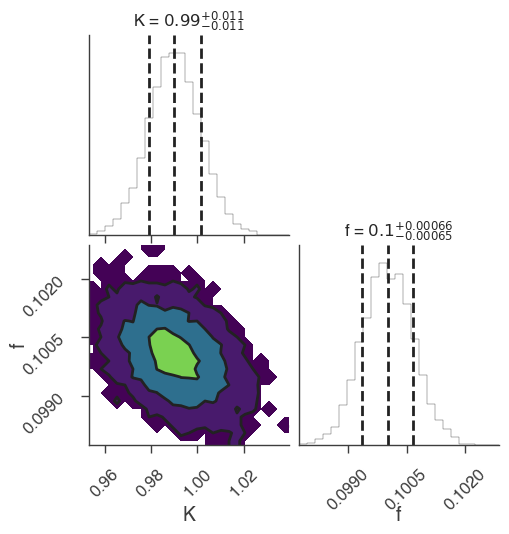

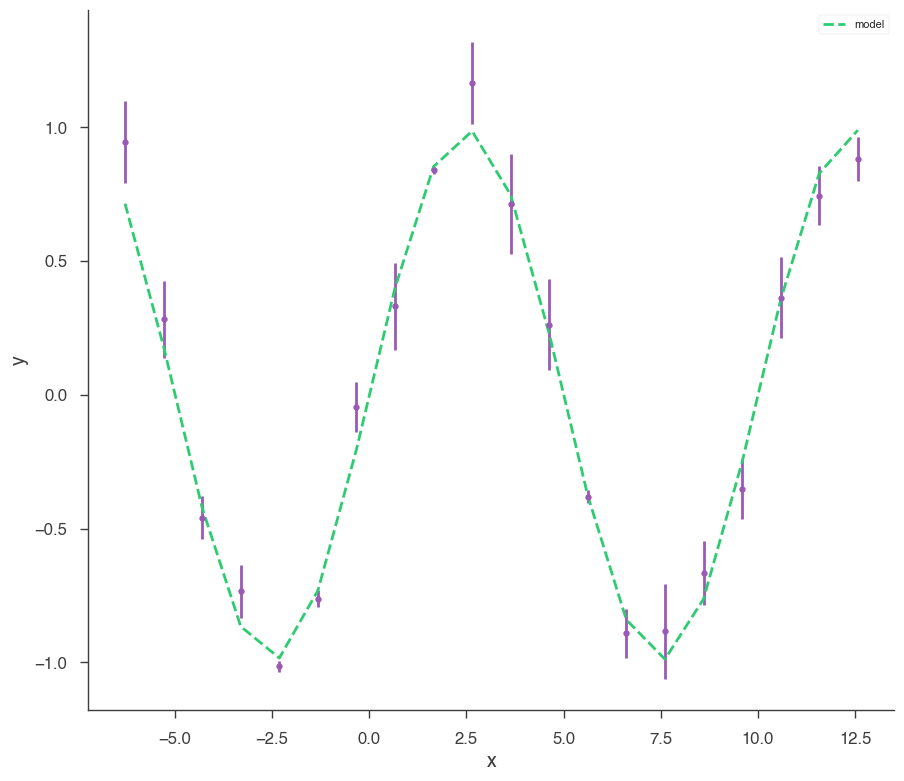

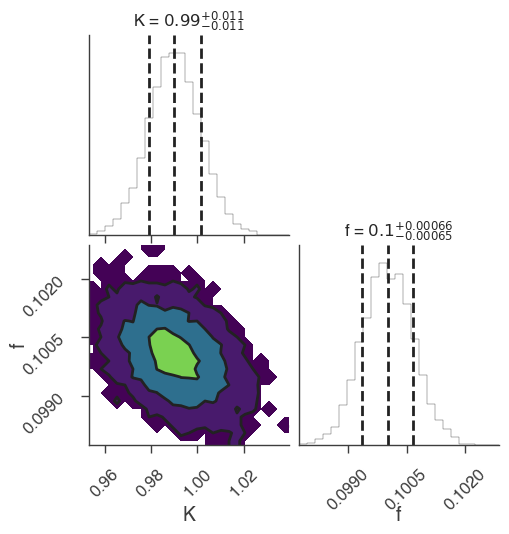

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

18:15:50 INFO      sampler set to ultranest                                                ]8;id=759145;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=680220;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 6031


[ultranest]   logZ = -18.87 +- 0.1217


[ultranest] Effective samples strategy satisfied (ESS = 982.1, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


18:15:59 INFO      fit restored to maximum of posterior                                         ]8;id=234437;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=70634;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=890418;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=380947;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 +/- 0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.007) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.293586
total,-9.293586


Values of statistical measures:

,statistical measures
AIC,23.293054
BIC,24.578636
DIC,22.635677
PDIC,2.024625
log(Z),-8.201171


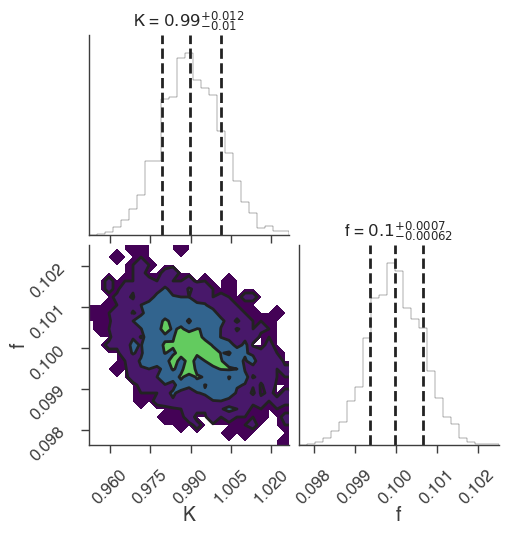

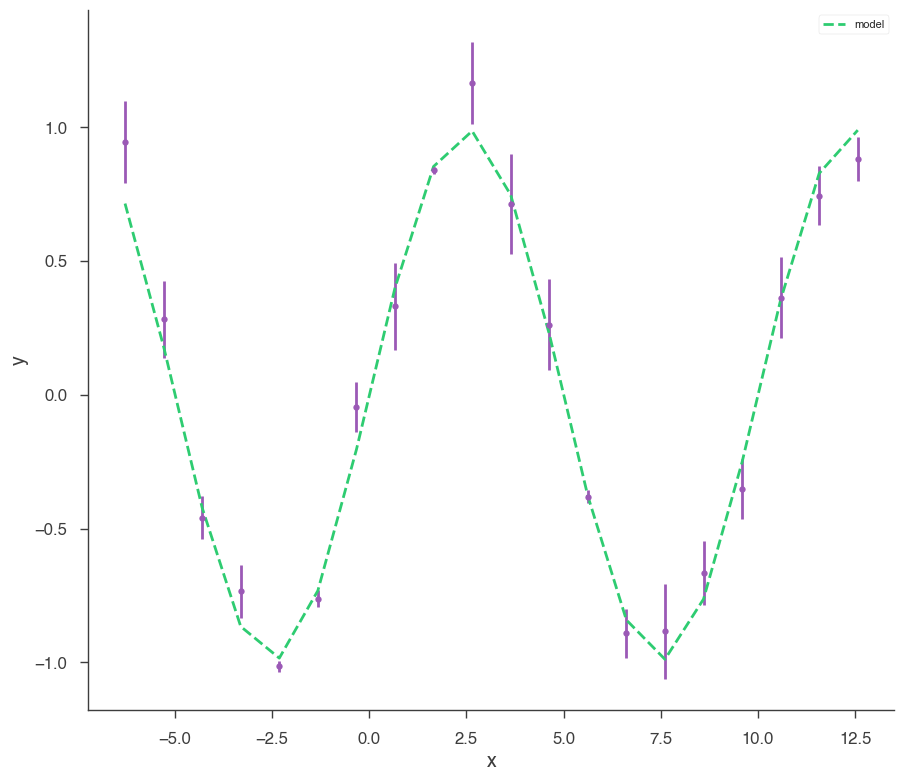

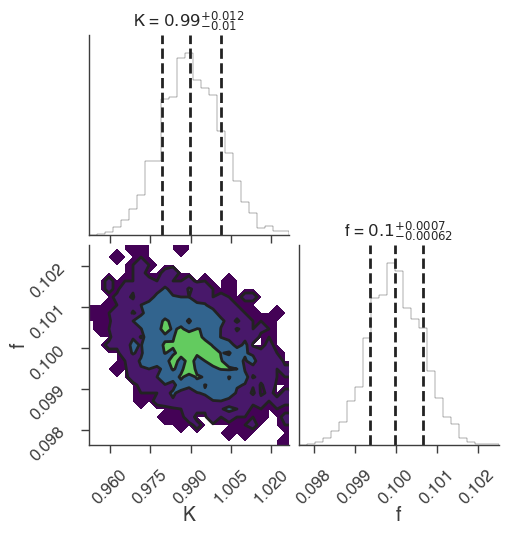

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()